## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/ColabNotebooks/Hackathon/Data_Train.csv')

In [16]:
df = pd.read_csv('C:/Users/Teja Lakkadasu/Desktop/GREAT LEARNING/Hackathon/Data_Train.csv')

In [17]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [19]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [20]:
df_num.head()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
0,95074,421802,633600.00,0,0,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,17,58598.0,31216.05,0.0,0
1,134131,3964312,85483.20,0,0,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,15,18924.0,11660.49,0.0,0
2,92602,4247560,79200.00,0,0,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,7,15604.0,5637.87,0.0,0
3,22591,197179,61600.00,0,0,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,9,22410.0,15607.17,0.0,1
4,125060,4646684,68053.92,0,0,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,10,36022.0,27472.86,0.0,0


In [21]:
df_cat.head()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
0,II,>10yrs,Vfied,MOR??AGE,GLENDALE NISSAN,fully paid,California,3 years,debt consolidation,I
1,IV,7yrs,Source Verified,REN?,Business Teacher,whole,NC,5 years,debt consolidation,I
2,III,<1yr,Source Verified,REN?,driver,whole,Florida,5 years,major purchase,I
3,III,<1yr,Vfied,REN?,AvePoint,fully paid,NewJersey,3 years,major purchase,I
4,V,2yrs,Source Verified,REN?,Lead Tester,fully paid,LA,5 years,debt consolidation,I


In [22]:
for i in df_cat.columns:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print('\n')

GGGrade
7
['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']


Experience
11
['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']


Validation
3
['Vfied' 'Source Verified' 'Not Vfied']


Home Status
5
['MOR??AGE' 'REN?' 'OWN' 'OTHER' 'NONE']


Designation
40354
['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep']


File Status
2
['fully paid' 'whole']


State
49
['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']


Duration
2
['3 years' '5 years']


Reason
13
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']


Claim Type
2
['I' 'J']




In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [23]:
df.GGGrade = df.GGGrade.replace({'I':1 , 'II':2 , 'III':3 , 'IV':4 , 'V':5 , 'VI':6 , 'VII':7})

df.Experience = df.Experience.replace({'>10yrs':10, '7yrs':7, '<1yr' : 0.5,'2yrs':2, '1yrs':1, '4yrs':4, '9yrs':9, '6yrs':6, '5yrs':5, '8yrs':8,'3yrs':3})

df.Validation = df.Validation.replace({'Vfied':1, 'Source Verified' :0,'Not Vfied':1})

df['Home Status'] = df['Home Status'].replace({'MOR??AGE':1, 'REN?':1, 'OWN':2, 'OTHER':3 ,'NONE':4})

df['Claim Type'] = df['Claim Type'].replace({'I':1 , 'J':2})

df.Duration = df.Duration.replace({'3 years':3 , '5 years':5})

df['File Status'] = df['File Status'].replace({'fully paid':0 , 'whole':1})

df['Designation'] = label_encoder.fit_transform(df['Designation'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
df['State'] = label_encoder.fit_transform(df['State'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  int64  
 3   Experience           87500 non-null  float64
 4   Validation           87500 non-null  int64  
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  int64  
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          87500 non-null  int64  
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


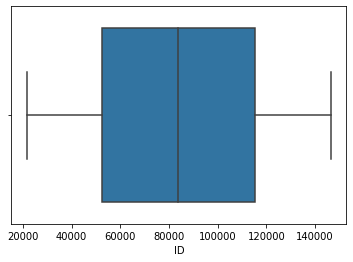

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


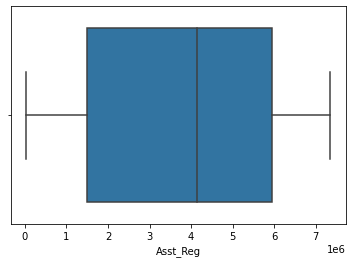

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


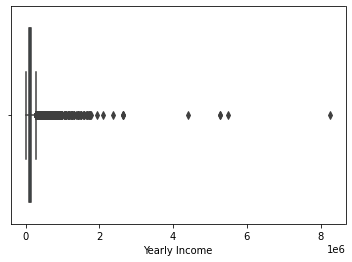

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


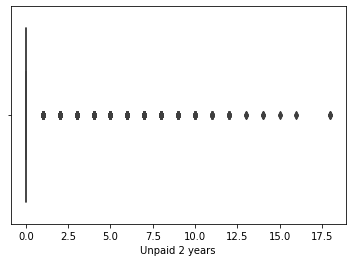

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


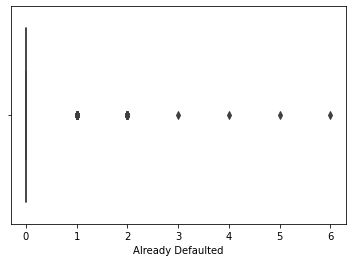

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


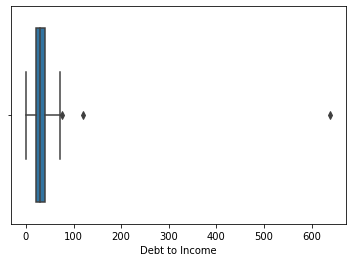

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


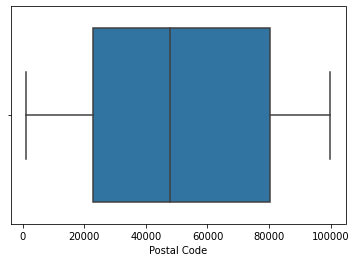

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


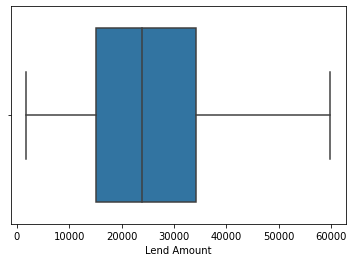

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


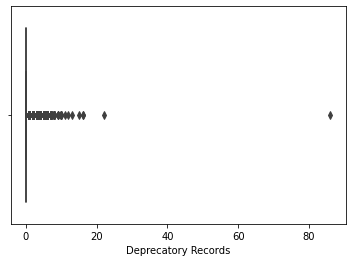

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


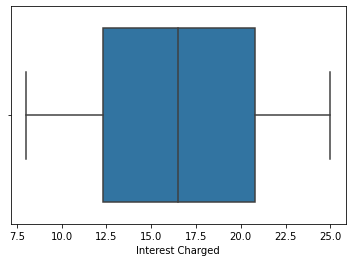

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


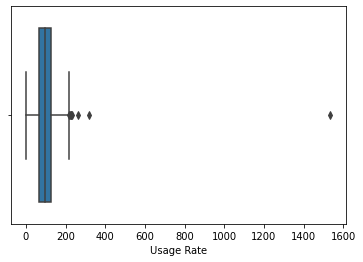

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


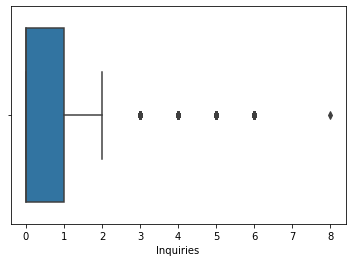

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


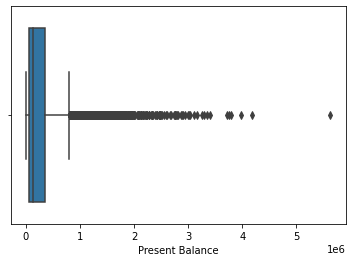

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


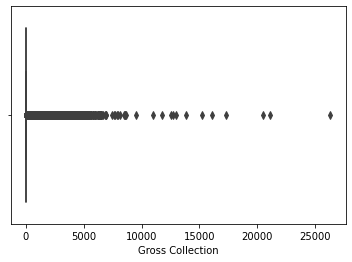

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


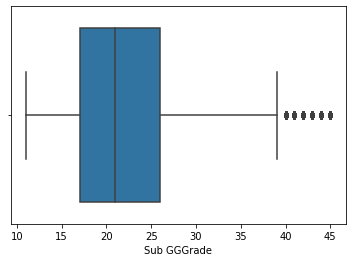

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


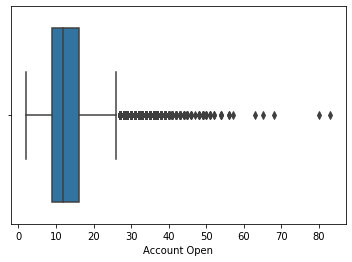

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


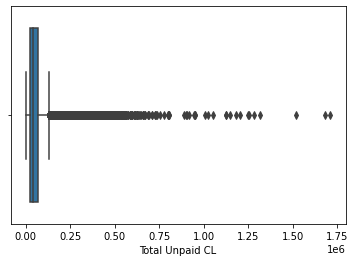

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


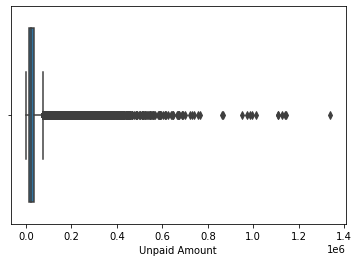

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


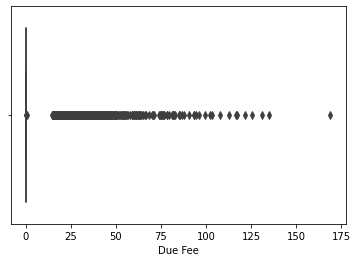

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


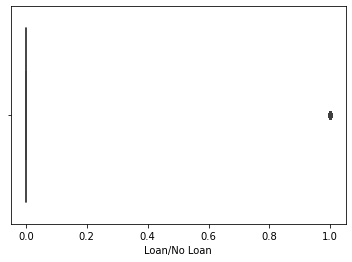

In [ ]:
for i in df_num.columns:
  sns.boxplot(df[i])
  plt.show( )

In [ ]:
for i in df_cat.columns:
  sns.countplot(df[i])
  plt.show()

## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction












In [ ]:
df.info()

NameError: ignored

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [ ]:
train = df.drop([''])

## Model 2 - Best Model

## Model 3